In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_VGG

Using TensorFlow backend.


Data type changed to float32, label type changed to categorical
Standardization Data


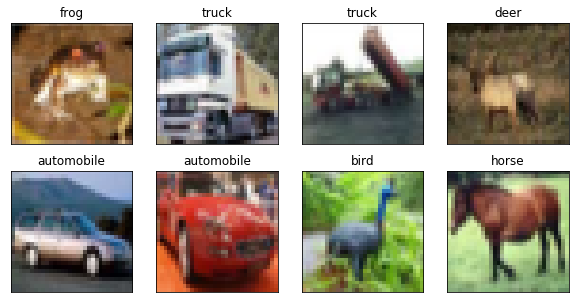

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_VGG.datasets.cifar10.load_data()


show_images(X_train_origin, Y_train_origin, 8)

(X_train, Y_train), (X_test, Y_test) = cifar_VGG_data_load(cifar10_VGG.datasets.cifar10)

In [3]:
cifar_model = cifar10_VGG.CifarVGG(img_shape = X_train[0].shape, class_num = 10,
                                      do_batch_norm = True, do_drop = True)

모델 펼처보기

In [4]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [5]:
history_train = cifar_model.train(X_train, Y_train, 2, 32, 0.2)

#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))
print('actual class : ', np.where(Y_test[:3])[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
 4096/40000 [==>...........................] - ETA: 1:35:37 - loss: 3.1280 - acc: 0.1318

KeyboardInterrupt: 

In [ ]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

In [ ]:
print('predict class : ',cifar_model.predict(X_test[:3]))

In [ ]:
prediction = cifar_model.predict(X_test)

In [ ]:
print(Y_test_origin[:8])
print(prediction[:8])

In [ ]:
show_images(X_test_origin, Y_test_origin, 8)

In [ ]:
show_images(X_test_origin, prediction, 8)

In [ ]:
show_images_compare(X_test_origin, Y_test_origin, prediction)

In [ ]:
result = cifar_model.show_eval(X_test, Y_test, 32)

In [ ]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

In [ ]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

In [ ]:
cifar10_VGG.plot_acc(history_train)

In [ ]:
cifar10_VGG.plot_loss(history_train)

In [ ]:
history_train.history['acc'][-1]

In [ ]:
prediction = cifar_model.model.predict(X_test)
Y_prediction = np.argmax(prediction, axis=1)

# label shape is digit
print(confusion_mat(Y_test_origin, Y_prediction))

In [ ]:
print(confusion_report(Y_test_origin, Y_prediction))

In [ ]:
np.unique(Y_test_origin)

In [ ]:
cifar_model.model.pop()

In [ ]:
cifar_model.show_model()

In [ ]:
cifar_model.model.pop()
cifar_model.show_model()